In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Classification Algorithms

- Classification involves categorizing data instances into predefined classes or categories based on their features.
- It's a supervised learning task where the algorithm learns from labeled training data to make predictions about the class labels of unseen instances.
-  The goal of classification is to build a model that accurately predicts the class labels of new instances based on their features, enabling automated decision-making and categorization.
- There are several classification algorithms
    - Logistic Regression
    - K Nearest Neighbour
    - Naive Bayes
    - Decision Trees
    - SVM
    - ..and a few more

#  Logistic Regression

-  Logistic regression is used when the dependent variable (outcome) is categorical, typically binary (e.g., 0 or 1, yes or no, true or false).
- It models the probability that an observation belongs to a particular category based on the values of one or more independent variables (predictors).


Problem Statement :

- Build a logistic regression model to predict the probability of active customers.
- Find the significant features from the above model and build another logistic regression model with
only the significant features.
- Build a confusion matrix and print the accuracy of the model.


SOLUTION :

In [ ]:
# Import dataset
df = pd.read_csv(r"E:\HSNC\SEM 2\ML\Fiberbits.csv")

In [6]:
df.head(5)

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,85,6,1,0,42,3,52
1,0,1581,85,6,1,0,66,4,66
2,0,1594,82,4,1,0,36,4,74
3,0,1594,82,5,1,0,37,4,67
4,1,1609,80,10,1,0,85,4,48


In [29]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   active_cust                 100000 non-null  int64
 1   income                      100000 non-null  int64
 2   months_on_network           100000 non-null  int64
 3   Num_complaints              100000 non-null  int64
 4   number_plan_changes         100000 non-null  int64
 5   relocated                   100000 non-null  int64
 6   monthly_bill                100000 non-null  int64
 7   technical_issues_per_month  100000 non-null  int64
 8   Speed_test_result           100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [7]:
# Checking for duplicate values
df.duplicated().value_counts()

False    99985
True        15
dtype: int64

In [8]:
# Dropping duuplicate values
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().value_counts()

False    99985
dtype: int64

<Axes: >

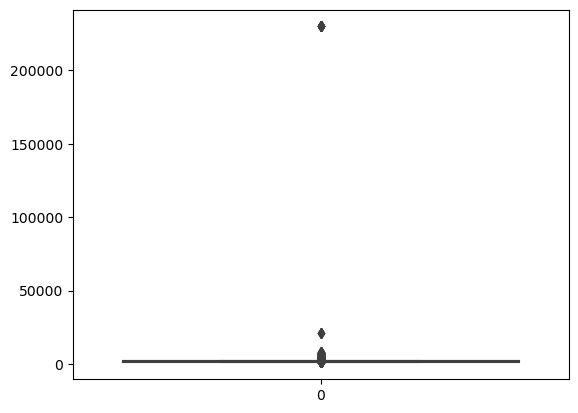

In [10]:
# Checking for outliers
# Box Plot
import seaborn as sns
sns.boxplot(df['income'])

In [23]:
# Removing outliers
for x in df.index:
    if df.loc[x,'income']>200000:
        df.drop(x,inplace=True)

<Axes: >

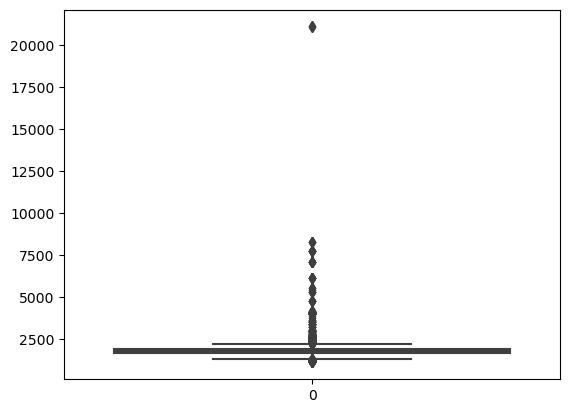

In [24]:
# Visuallizing after removing outliers
# Box Plot
import seaborn as sns
sns.boxplot(df['income'])

In [26]:
# Independent variable
# As we can see in the dataset "active_cust" is dependent variable
# we consider all other variables to be independent
x = df.iloc[:,1:] 

In [27]:
# Dependent variable
# It is binary aswell
y = df.iloc[:,0]

In [25]:
df.describe()

,active_cust,income,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
count,99971.000000,99971.000000,99971.000000,99971.000000,99971.000000,99971.000000,99971.000000,99971.000000,99971.000000
mean,0.578518,1823.338048,58.414360,6.014064,1.385462,0.123496,54.887867,3.885517,53.485661
std,0.493799,283.935636,18.622342,2.731355,1.616959,0.329007,26.227189,1.690711,19.174216
min,0.000000,1130.000000,-16.000000,0.000000,0.000000,0.000000,10.000000,2.000000,15.000000
25%,0.000000,1674.000000,47.000000,5.000000,0.000000,0.000000,32.000000,3.000000,40.000000
50%,1.000000,1805.000000,56.000000,6.000000,1.000000,0.000000,55.000000,4.000000,54.000000
75%,1.000000,1907.000000,70.000000,8.000000,2.000000,0.000000,78.000000,5.000000,68.000000
max,1.000000,21114.000000,449.000000,10.000000,9.000000,1.000000,100.000000,12.000000,90.000000


In [28]:
# StandardScaler is used for standardization
# Standardization means it scales the features (variables) so that they have a mean of 0 and a standard deviation of 1.
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(x).transform(x)

In [29]:
# Initializing training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1)

In [30]:
# Training the data
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression()

In [31]:
# Predicting the data based upon training model
y_pred = LR.predict(X_test)

In [32]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
# Checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8658824470851838

In [34]:
# Creating confusion matrix to calculate precision and recall
# A confusion matrix is a grid that helps us see how well a classification model is doing by comparing its predictions with the actual outcomes. It shows us where the model is making correct predictions and where it's getting confused.
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[ 8580,  1902],
       [ 1450, 13061]], dtype=int64)

# Confusion Matrix
- A confusion matrix is a grid that helps us see how well a classification model is doing by comparing its predictions with the actual outcomes. 
- It shows us where the model is making correct predictions and where it's getting confused.
- It shows counts of true positive, true negative, false positive, and false negative predictions.




In [35]:
TP = con_matrix[1,1]
TN = con_matrix[0,0]
FP = con_matrix[0,1]
FN = con_matrix[1,0]

In [40]:
# Precision tells us how many of the predicted positive cases were actually positive
precision = TP / (TP + FP)

In [41]:
precision

0.8728864532513534

In [42]:
# Recall tells us how many of the actual positive cases were predicted correctly by the model.
recall =  TP / (TP + FN)

In [43]:
recall

0.9000758045620564

In [44]:
# The overall accuracy
Acc = (TP+TN) / (TP+TN+FP+FN)
Acc

0.8658824470851838

In [45]:
# Using logit to fit model and get a summary of model
import statsmodels.api as sm 
log_reg = sm.Logit(y,X).fit() 

Optimization terminated successfully.
         Current function value: 0.301630
         Iterations 8


In [46]:
# Analysing p-value of features to understand the impactful features 
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:            active_cust   No. Observations:                99971
Model:                          Logit   Df Residuals:                    99963
Method:                           MLE   Df Model:                            7
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                  0.5569
Time:                        17:56:30   Log-Likelihood:                -30154.
converged:                       True   LL-Null:                       -68057.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3837      0.025     15.153      0.000       0.334       0.433
x2             0.7493      0.022     34.403      0.000       0.707       0.792
x3             2.1626      0.017    125.862      0.0

In [47]:
# Removing non-impactful features
df1 = df.drop('monthly_bill',axis=1)

In [48]:
df1.drop('technical_issues_per_month',axis=1,inplace=True)

In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99971 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   active_cust          99971 non-null  int64
 1   income               99971 non-null  int64
 2   months_on_network    99971 non-null  int64
 3   Num_complaints       99971 non-null  int64
 4   number_plan_changes  99971 non-null  int64
 5   relocated            99971 non-null  int64
 6   Speed_test_result    99971 non-null  int64
dtypes: int64(7)
memory usage: 8.1 MB


In [50]:
# Creating the model again after removing non-impactful features
x1 = df.iloc[:,1:]

In [58]:
from sklearn import preprocessing
X1 = preprocessing.StandardScaler().fit(x1).transform(x1)

In [59]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.25,random_state = 1)

In [60]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(x1_train,y_train)
LR

LogisticRegression()

In [61]:
y_pred = LR.predict(x1_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test,y_pred)

0.8658824470851838

- As we can see theres no difference in accuracy score after removin those non-impactful features.
- Meaning they were non-impactful.

In [67]:
LR.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [68]:
LR.predict_proba(X_test)

array([[0.04885738, 0.95114262],
       [0.01021322, 0.98978678],
       [0.17084016, 0.82915984],
       ...,
       [0.07798134, 0.92201866],
       [0.02738072, 0.97261928],
       [0.00875727, 0.99124273]])